# Пример распознавания лиц с помощью библиотеки Scikit-Learn

In [16]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [26]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import seaborn as sns
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


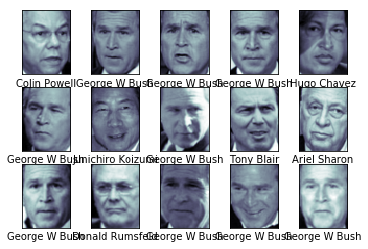

In [18]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [19]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [20]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data,
                                                faces.target,
                                                random_state=42)

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

C:\Users\marat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 25.3 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [22]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

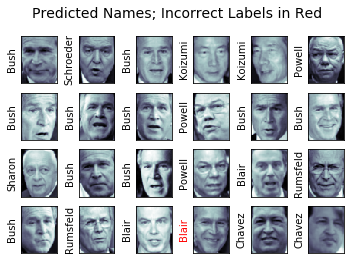

In [23]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    #Черный текст это верные метки, а красный тект это неверные метки     
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
    fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [24]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

        micro avg       0.85      0.85      0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



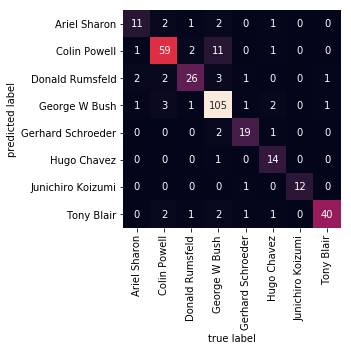

In [27]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Пример распознавания объектов с помощью библиотеки Tensorflow


In [28]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install tensorflow

  Stored in directory: C:\Users\marat\AppData\Local\pip\Cache\wheels\5c\2e\7e\a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Stored in directory: C:\Users\marat\AppData\Local\pip\Cache\wheels\ee\98\38\46cbcc5a93cfea5492d19c38562691ddb23b940176c14f7b48
  Stored in directory: C:\Users\marat\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built gast absl-py termcolor
Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install https://github.com/OlafenwaMoses/ImageAI/releases/download/2.0.2/imageai-2.0.2-py3-none-any.whl

Note: you may need to restart the kernel to use updated packages.


[{'name': 'cat', 'percentage_probability': 86.39129996299744, 'box_points': array([ 49, 251, 322, 464])}, {'name': 'dog', 'percentage_probability': 99.97657537460327, 'box_points': array([319,  36, 663, 332])}]


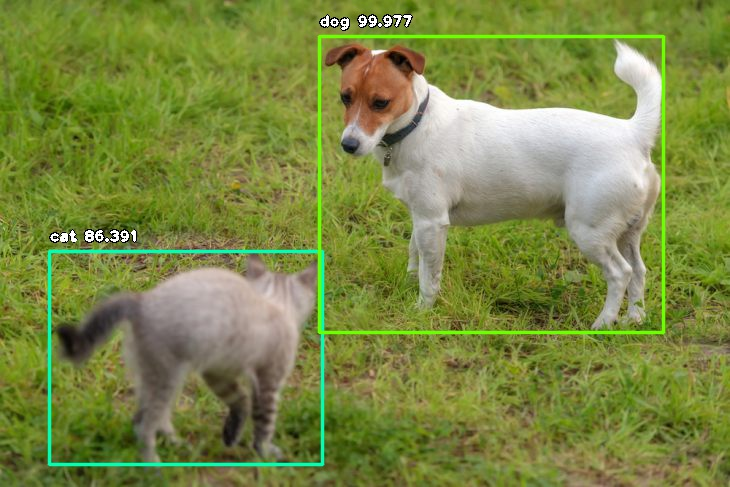

In [7]:
from imageai.Detection import ObjectDetection
import os
import tensorflow
from IPython.display import Image

exec_path = os.getcwd()

detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath(os.path.join(
    exec_path, "resnet50_coco_best_v2.0.1.h5")
)
detector.loadModel()

list = detector.detectObjectsFromImage(
    input_image=os.path.join(exec_path, "1.jpg"),
    output_image_path=os.path.join(exec_path, "2.jpg"),
    minimum_percentage_probability=60,
    display_percentage_probability=True,
    display_object_name=True
)
print(list)
Image('2.jpg')

[{'name': 'backpack', 'percentage_probability': 51.83432102203369, 'box_points': array([291, 275, 418, 401])}, {'name': 'handbag', 'percentage_probability': 65.6201422214508, 'box_points': array([305, 540, 445, 731])}, {'name': 'person', 'percentage_probability': 91.59557819366455, 'box_points': array([412, 177, 753, 736])}, {'name': 'person', 'percentage_probability': 74.67083930969238, 'box_points': array([148, 247, 282, 617])}, {'name': 'person', 'percentage_probability': 58.15470218658447, 'box_points': array([159, 225, 424, 716])}, {'name': 'person', 'percentage_probability': 93.64887475967407, 'box_points': array([  1, 283, 206, 755])}, {'name': 'person', 'percentage_probability': 68.15670728683472, 'box_points': array([147, 177, 666, 741])}]


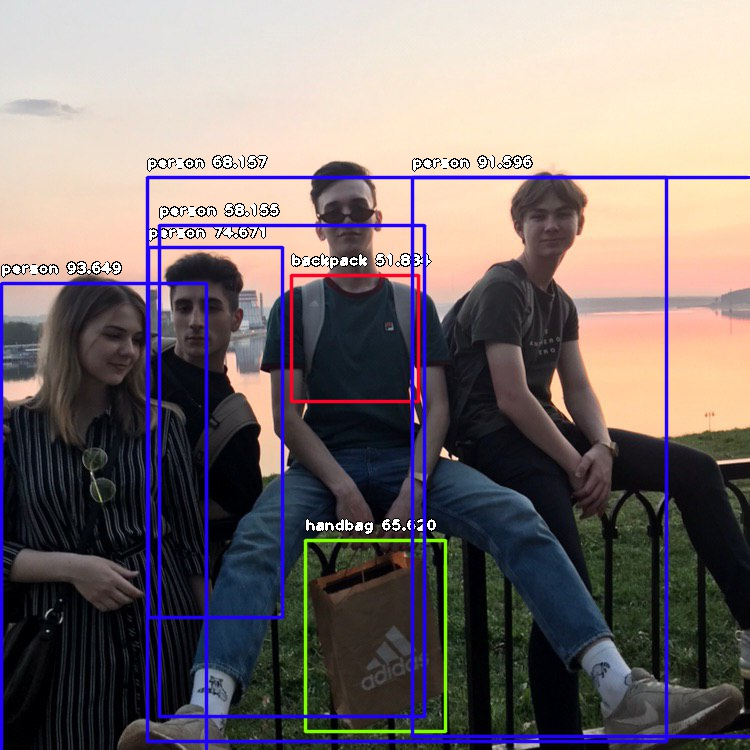

In [15]:
detector.setModelPath(os.path.join(
    exec_path, "resnet50_coco_best_v2.0.1.h5")
)
detector.loadModel()

list = detector.detectObjectsFromImage(
    input_image=os.path.join(exec_path, "me.jpg"),
    output_image_path=os.path.join(exec_path, "me2.jpg"),
    minimum_percentage_probability=51,
    display_percentage_probability=True,
    display_object_name=True
)
print(list)
Image('me2.jpg')